# Machine Learning - Linear Regression with one variable
## (Matlab/Octave)

This exercise is taken from Machine Learning course on [coursera](https://www.coursera.org/learn/machine-learning/home/assignments) website. 

In the case of one variable linear regression, we are trying to find the best parameter matrix $\theta$ that would result in the best fitting line on the X-Y scatter plot.

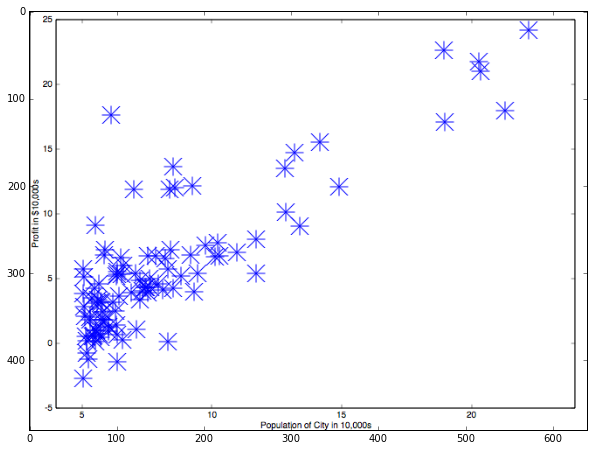

In this case, the feature matrix X only contains one feature which is population of the city.
We start from a set of theta for the hypothesis function:
    h($\theta$) = $\theta^T$ .X 
And we iterate until the best fit is obtained. In this scenario the best-fit is determined through minimization of the cost function:

J($\theta$) =  ${1 \over 2m} \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2 + \lambda \sum_{j=1}^{n} {\theta_j}^2$

Where m is the number of data points in the training set (blue asterisks in the plot), and n is the number of features. $\lambda$ is the regularization term to prevent under- or over-fitting of the data. 

We start from ($\theta_0,\theta_1$) and in every iteration we update them as follows:
$\theta_j = \theta_j - \alpha {\partial J(\theta) \over \partial \theta_j}$

## The following programs are written in MATLAB/OCTAVE 
##### 1. This is the main body of the linear regression code: 

In [ ]:
%% Machine Learning Online Class - Exercise 1: Linear Regression
%  ------------
%  This file contains code that helps you get started on the
%  linear exercise. You will need to complete the following functions 
%  in this exericse:
%
%     warmUpExercise.m
%     plotData.m
%     gradientDescent.m
%     computeCost.m
%     gradientDescentMulti.m
%     computeCostMulti.m
%     featureNormalize.m
%     normalEqn.m
%
%  For this exercise, you will not need to change any code in this file,
%  or any other files other than those mentioned above.
%
% x refers to the population size in 10,000s
% y refers to the profit in $10,000s
%

%% Initialization
clear ; close all; clc

%% ==================== Part 1: Basic Function ====================
% Complete warmUpExercise.m 
fprintf('Running warmUpExercise ... \n');
fprintf('5x5 Identity Matrix: \n');
warmUpExercise()

fprintf('Program paused. Press enter to continue.\n');
pause;


%% ======================= Part 2: Plotting =======================
fprintf('Plotting Data ...\n')
data = load('ex1data1.txt');
X = data(:, 1); y = data(:, 2);
m = length(y); % number of training examples

% Plot Data
% Note: You have to complete the code in plotData.m
plotData(X, y);

fprintf('Program paused. Press enter to continue.\n');
pause;

%% =================== Part 3: Gradient descent ===================
fprintf('Running Gradient Descent ...\n')

X = [ones(m, 1), data(:,1)]; % Add a column of ones to x
theta = zeros(2, 1); % initialize fitting parameters

% Some gradient descent settings
iterations = 1500;
alpha = 0.01;

% compute and display initial cost
computeCost(X, y, theta)

% run gradient descent
theta = gradientDescent(X, y, theta, alpha, iterations);

% print theta to screen
fprintf('Theta found by gradient descent: ');
fprintf('%f %f \n', theta(1), theta(2));

% Plot the linear fit
hold on; % keep previous plot visible
plot(X(:,2), X*theta, '-')
legend('Training data', 'Linear regression')
hold off % don't overlay any more plots on this figure

% Predict values for population sizes of 35,000 and 70,000
predict1 = [1, 3.5] *theta;
fprintf('For population = 35,000, we predict a profit of %f\n',...
    predict1*10000);
predict2 = [1, 7] * theta;
fprintf('For population = 70,000, we predict a profit of %f\n',...
    predict2*10000);

fprintf('Program paused. Press enter to continue.\n');
pause;

%% ============= Part 4: Visualizing J(theta_0, theta_1) =============
fprintf('Visualizing J(theta_0, theta_1) ...\n')

% Grid over which we will calculate J
theta0_vals = linspace(-10, 10, 100);
theta1_vals = linspace(-1, 4, 100);

% initialize J_vals to a matrix of 0's
J_vals = zeros(length(theta0_vals), length(theta1_vals));

% Fill out J_vals
for i = 1:length(theta0_vals)
    for j = 1:length(theta1_vals)
	  t = [theta0_vals(i); theta1_vals(j)];    
	  J_vals(i,j) = computeCost(X, y, t);
    end
end


% Because of the way meshgrids work in the surf command, we need to 
% transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals';
% Surface plot
figure;
surf(theta0_vals, theta1_vals, J_vals)
xlabel('\theta_0'); ylabel('\theta_1');

% Contour plot
figure;
% Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
contour(theta0_vals, theta1_vals, J_vals, logspace(-2, 3, 20))
xlabel('\theta_0'); ylabel('\theta_1');
hold on;
plot(theta(1), theta(2), 'rx', 'MarkerSize', 10, 'LineWidth', 2);


##### This is the plotting portion of the code:

In [ ]:
function plotData(x, y)
figure; % open a new figure window
plot(x,y, 'b*','MarkerSize', 10)
axis([4, 24, -5, 25])
ylabel('Profit in $10,000s');
xlabel('Population of City in 10,000s');
end

##### This code calculates the cost function $J(\theta)$

In [ ]:
function J = computeCost(X, y, theta)
%COMPUTECOST Compute cost for linear regression
%   J = COMPUTECOST(X, y, theta) computes the cost of using theta as the
%   parameter for linear regression to fit the data points in X and y

m = length(y); % number of training examples
h_theta = theta' * X';
term = (h_theta' - y).^2 ;
J = (1/(2.*m)).*sum(term);
end


##### This code will run the Gradient Decent until J($\theta$) is minimized and return the parameters:

In [ ]:
function [theta, J_history] = gradientDescent(X, y, theta, alpha, num_iters)

%GRADIENTDESCENT Performs gradient descent to learn theta
%   theta = GRADIENTDESENT(X, y, theta, alpha, num_iters) updates theta by 
%   taking num_iters gradient steps with learning rate alpha


% Initialize some useful values
m = length(y); % number of training examples
J_history = zeros(num_iters, 1);

for iter = 1:num_iters

    % Save the cost J in every iteration    
    J_history(iter) = computeCost(X, y, theta);

%    fprintf('iter %f J %f Theta %f %f \n', 
%          iter, J_history(iter), theta(1), theta(2));
   
    
h_theta = theta' * X';
this_term = ((h_theta'-y)');

theta(1) = theta(1) - ((alpha/m)*sum(this_term));
theta(2) = theta(2) - ((alpha/m)*sum(this_term*X(:,2)));

end
end


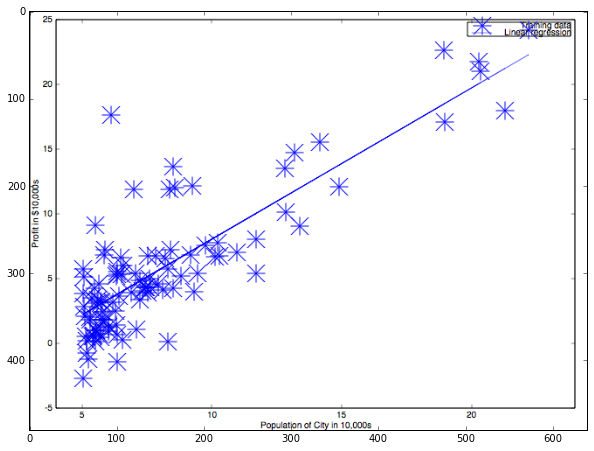

##### These two are basically contour and surface plos that show the variation of the cost function throughout the iterations. 

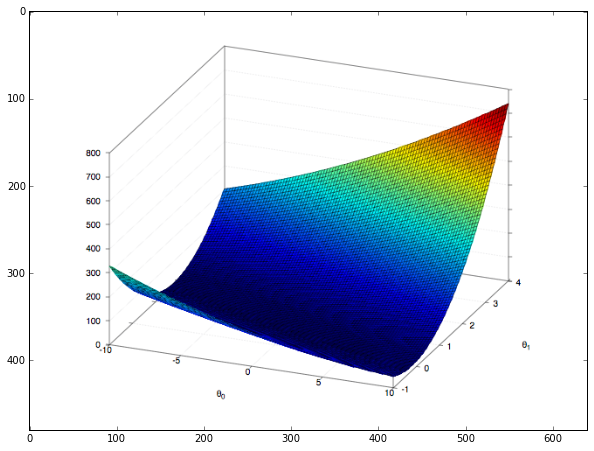

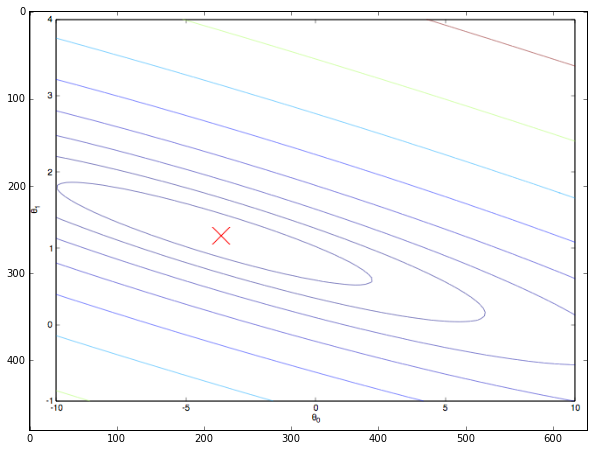